In [1]:
require(ggplot2)
require(data.table)
require(Hmisc)

Loading required package: ggplot2
Loading required package: data.table
Loading required package: Hmisc
Loading required package: lattice
Loading required package: survival
Loading required package: Formula

Attaching package: ‘Hmisc’

The following objects are masked from ‘package:base’:

    format.pval, round.POSIXt, trunc.POSIXt, units



In [2]:
# install.packages('bit64')

In [3]:
directory = "/mnt/sdb1/baseerat/numerical-evals/12-11-2017/logs-1M"
plotTheme <- theme(legend.title=element_blank(), legend.position="top", legend.text=element_text(size=6))

In [4]:
groupSizePerGroupPerTenant <- fread(paste(directory, "group_size_per_group_per_tenant.csv", sep="/"), sep=",", 
                                    header=TRUE)

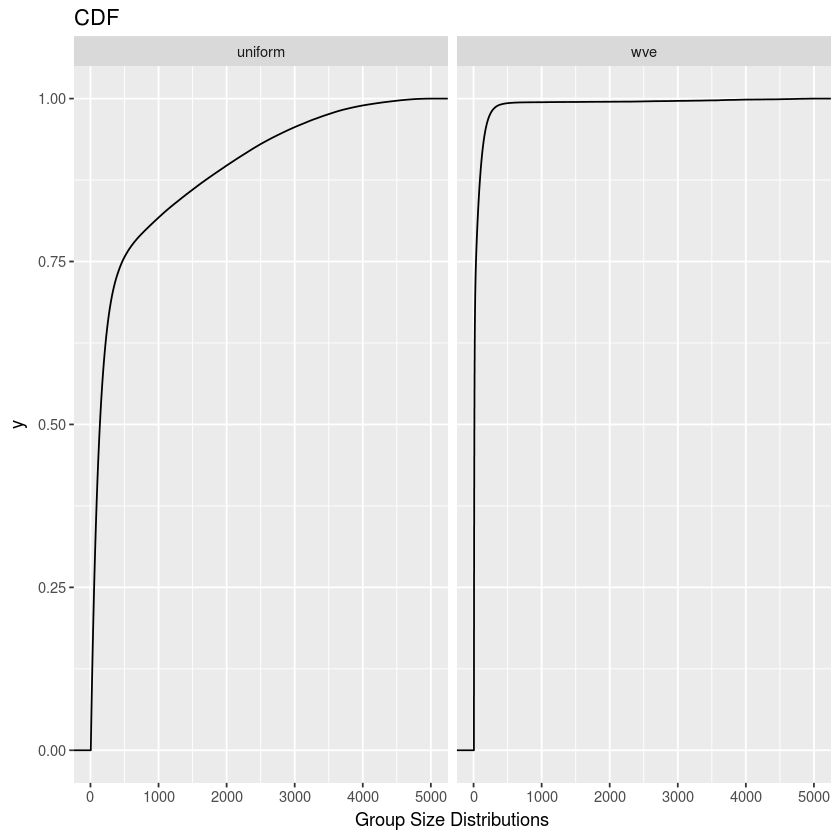

In [5]:
ggplot(groupSizePerGroupPerTenant) +
   stat_ecdf(aes(x=groupSize)) +
   facet_grid(. ~ groupSizeDist) +
   ggtitle("CDF") +
   xlab("Group Size Distributions") +
   plotTheme
# ggsave(plt, file="group_size_per_group_per_tenant.pdf", height=3, width=7)

In [6]:
groupsCoveredWithBitmapsOnlyForPods <- fread(paste(directory, 
                                                   "groups_covered_with_bitmaps_only_for_pods.csv", sep="/"), sep=",", 
                                             header=TRUE)

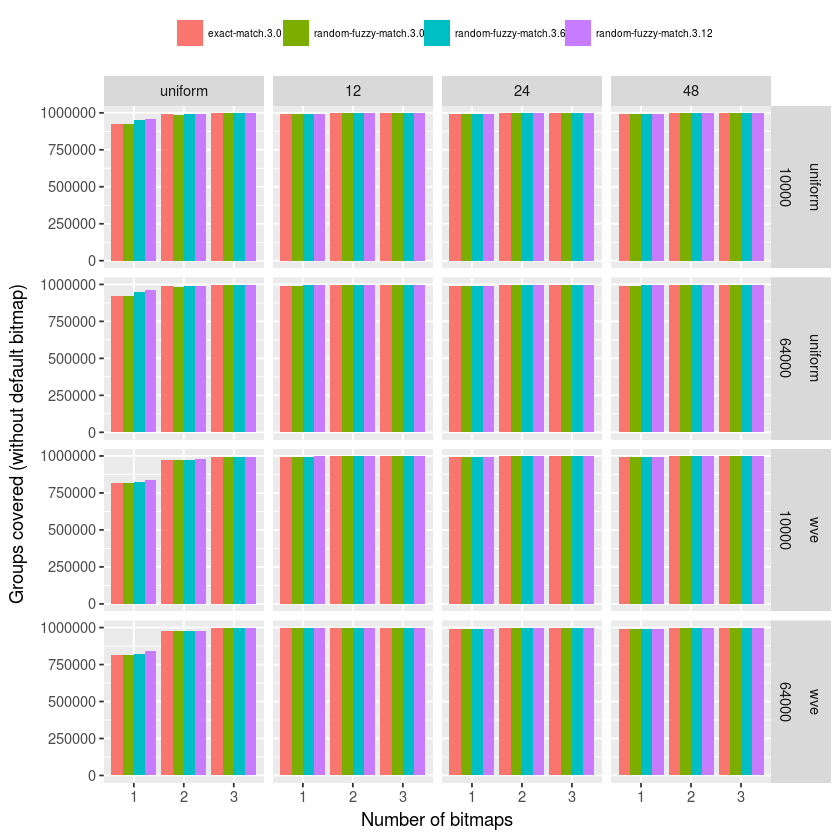

In [9]:
ggplot(groupsCoveredWithBitmapsOnlyForPods) +
   geom_bar(aes(y=groupsCoveredWithoutDefaultBitmap, x=factor(podsNumBitmaps), 
                fill=interaction(podsAlgorithm, podsNumNodesPerBitmap, podsRedundancyPerBitmap)),
            stat="identity",position=position_dodge()) +
   facet_grid(groupSizeDist * podsNumRules ~ factor(placementNumHostsPerLeaf, levels=c('uniform','12','24','48'))) +
   xlab("Number of bitmaps") +
   ylab("Groups covered (without default bitmap)") +
   plotTheme
# ggsave(plt, file="groups_covered_with_bitmaps_only_for_pods.pdf", height=5, width=7)

In [11]:
groupsCoveredWithBitmapsOnlyForLeafs <- fread(paste(directory, 
                                                   "groups_covered_with_bitmaps_only_for_leafs.csv", sep="/"), sep=",", 
                                             header=TRUE)

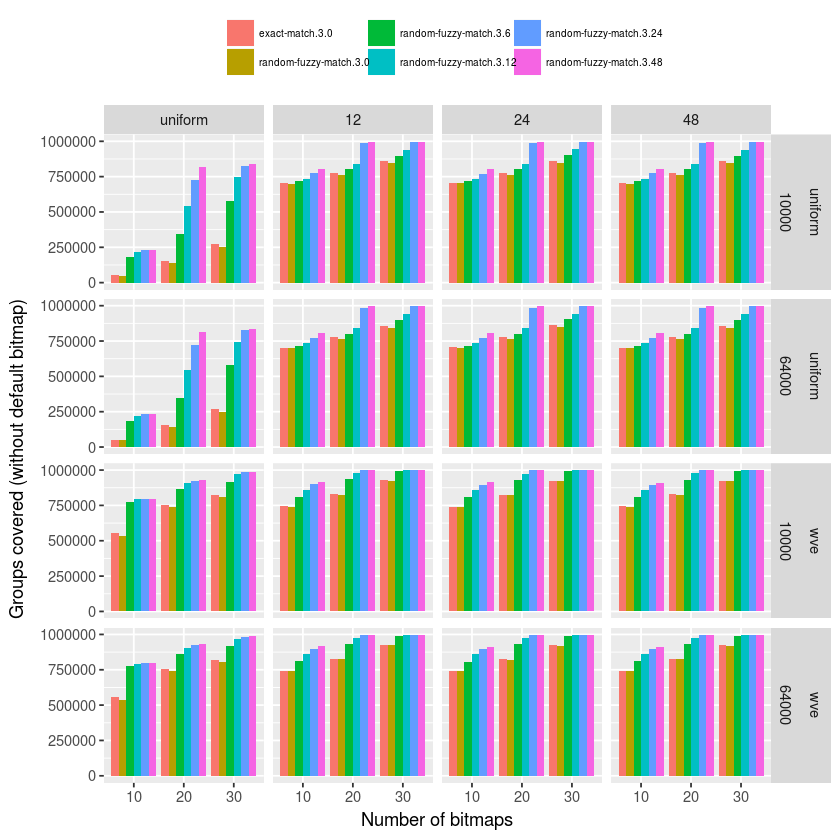

In [12]:
ggplot(groupsCoveredWithBitmapsOnlyForLeafs) +
   geom_bar(aes(y=groupsCoveredWithoutDefaultBitmap, x=factor(leafsNumBitmaps), 
                fill=interaction(leafsAlgorithm, leafsNumNodesPerBitmap, leafsRedundancyPerBitmap)),
            stat="identity",position=position_dodge()) +
   facet_grid(groupSizeDist * leafsNumRules ~ factor(placementNumHostsPerLeaf, levels=c('uniform','12','24','48'))) +
   xlab("Number of bitmaps") +
   ylab("Groups covered (without default bitmap)") +
   plotTheme
# ggsave(plt, file="groups_covered_with_bitmaps_only_for_leafs.pdf", height=5, width=7)

In [13]:
ruleCountForPods <- fread(paste(directory, "rule_count_for_pods.csv", sep="/"), sep=",", header=TRUE)

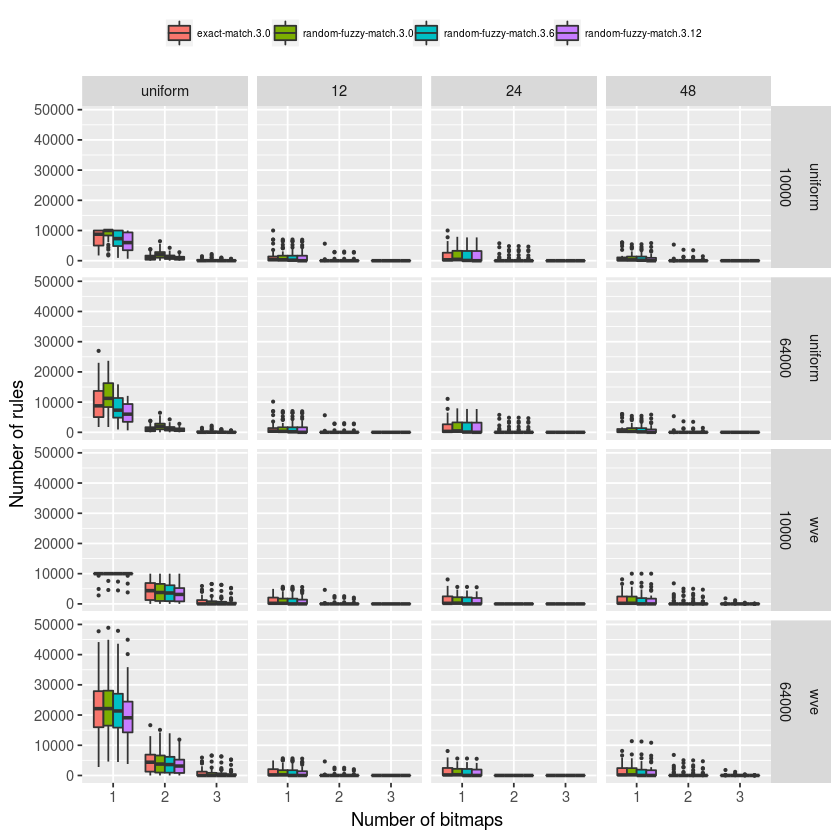

In [14]:
ggplot(ruleCountForPods) +
    geom_boxplot(aes(y=numRules, x=factor(podsNumBitmaps), 
                     fill=interaction(podsAlgorithm, podsNumNodesPerBitmap, podsRedundancyPerBitmap)),
                 outlier.size=0.5) +
    facet_grid(groupSizeDist * podsNumRules ~ factor(placementNumHostsPerLeaf, levels=c('uniform','12','24','48'))) +
    xlab("Number of bitmaps") +
    ylab("Number of rules") +
    plotTheme
# ggsave(plt, file="rule_count_for_pods.pdf", height=5, width=7)

In [15]:
ruleCountForLeafs <- fread(paste(directory, "rule_count_for_leafs.csv", sep="/"), sep=",", header=TRUE)

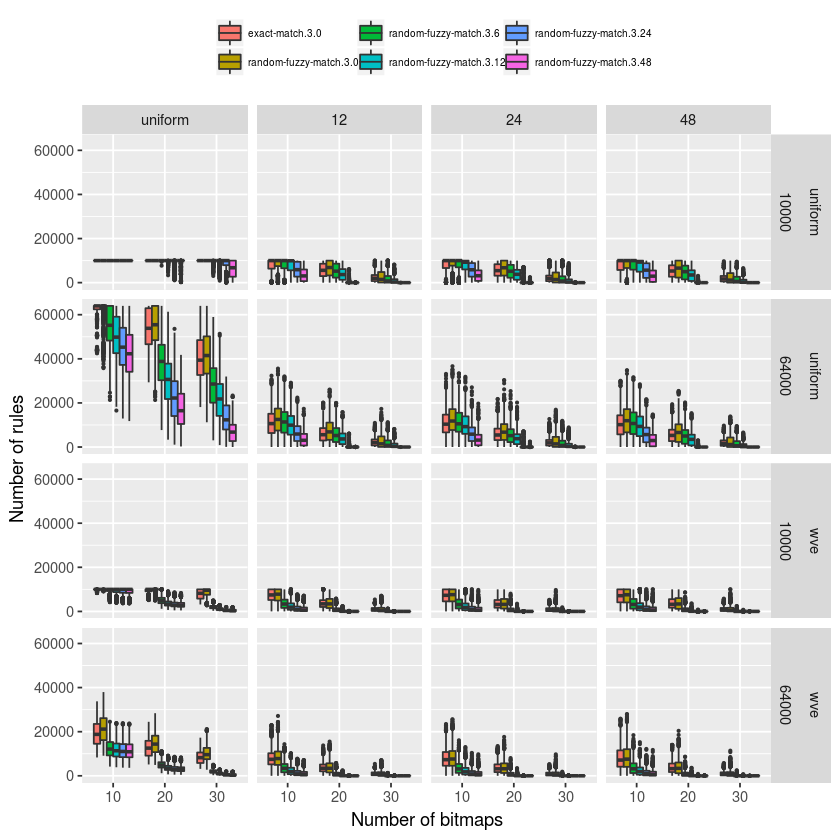

In [16]:
ggplot(ruleCountForLeafs) +
    geom_boxplot(aes(y=numRules, x=factor(leafsNumBitmaps), 
                     fill=interaction(leafsAlgorithm, leafsNumNodesPerBitmap, leafsRedundancyPerBitmap)),
                 outlier.size=0.5) +
    facet_grid(groupSizeDist * leafsNumRules ~ factor(placementNumHostsPerLeaf, levels=c('uniform','12','24','48'))) +
    xlab("Number of bitmaps") +
    ylab("Number of rules") +
    plotTheme
# ggsave(plt, file="rule_count_for_leafs.pdf", height=5, width=7)

In [17]:
trafficPerGroupPerTenant <- fread(paste(directory, "traffic_per_group_per_tenant.csv", sep="/"), sep=",", 
                                  header=TRUE)

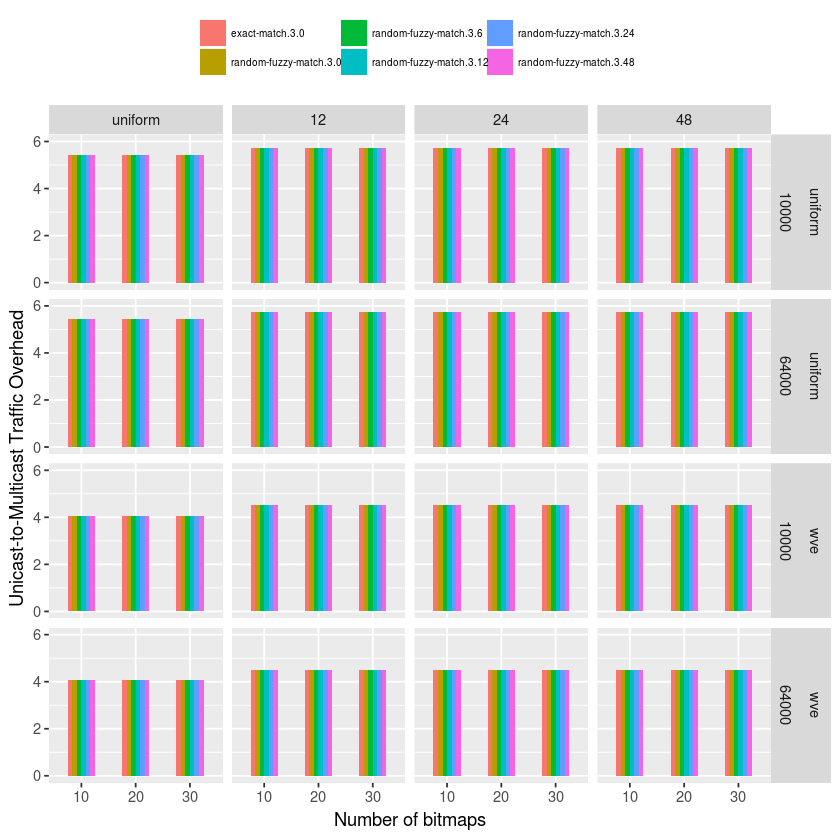

In [21]:
ggplot(trafficPerGroupPerTenant, 
       aes(y=unicastTraffic/multicastTraffic, x=factor(leafsNumBitmaps), 
           fill=interaction(leafsAlgorithm, leafsNumNodesPerBitmap, leafsRedundancyPerBitmap))) +
    stat_summary(fun.y = mean, geom = "bar", position=position_dodge(0.5), width=0.5) +
    facet_grid(groupSizeDist * leafsNumRules ~ factor(placementNumHostsPerLeaf, 
                                                      levels=c('uniform','12','24','48'))) +
    ylim(c(0, 6)) +
    xlab("Number of bitmaps") +
    ylab("Unicast-to-Multicast Traffic Overhead") +
    plotTheme
# ggsave(plt, file="leaf_spine_unicast_overhead_per_group_per_tenant.pdf", height=5, width=7)

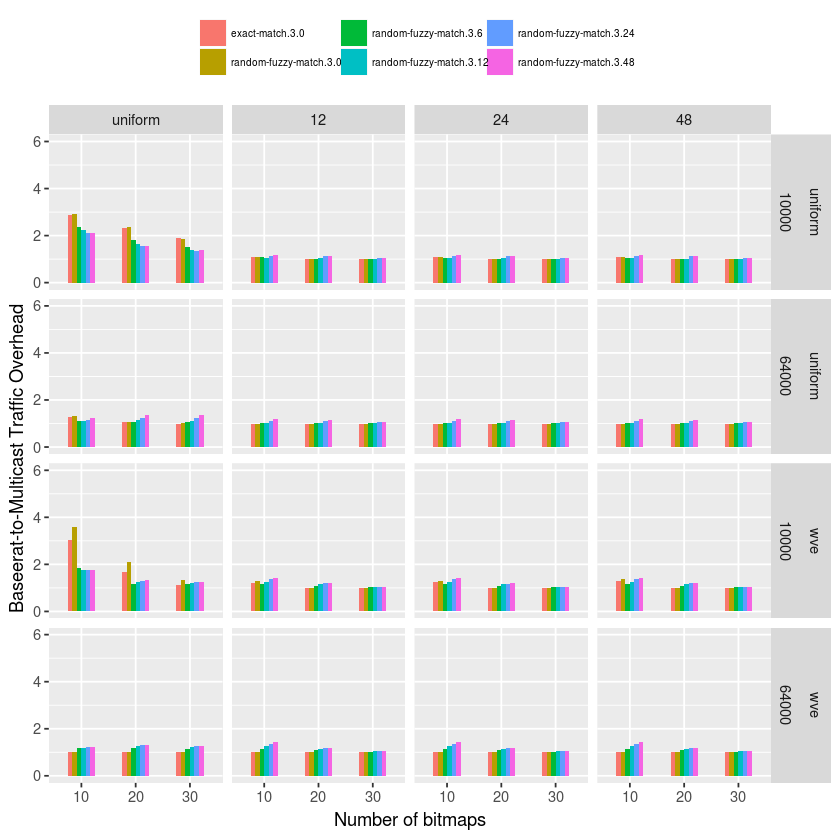

In [22]:
ggplot(trafficPerGroupPerTenant, 
       aes(y=baseeratTraffic/multicastTraffic, x=factor(leafsNumBitmaps), 
           fill=interaction(leafsAlgorithm, leafsNumNodesPerBitmap, leafsRedundancyPerBitmap))) +
    stat_summary(fun.y = mean, geom = "bar", position=position_dodge(0.5), width=0.5) +
    facet_grid(groupSizeDist * leafsNumRules ~ factor(placementNumHostsPerLeaf, 
                                                      levels=c('uniform','12','24','48'))) +
    ylim(c(0, 6)) +
    xlab("Number of bitmaps") +
    ylab("Baseerat-to-Multicast Traffic Overhead") +
    plotTheme
# ggsave(plt, file="leaf_spine_baseerat_overhead_per_group_per_tenant.pdf", height=5, width=7)

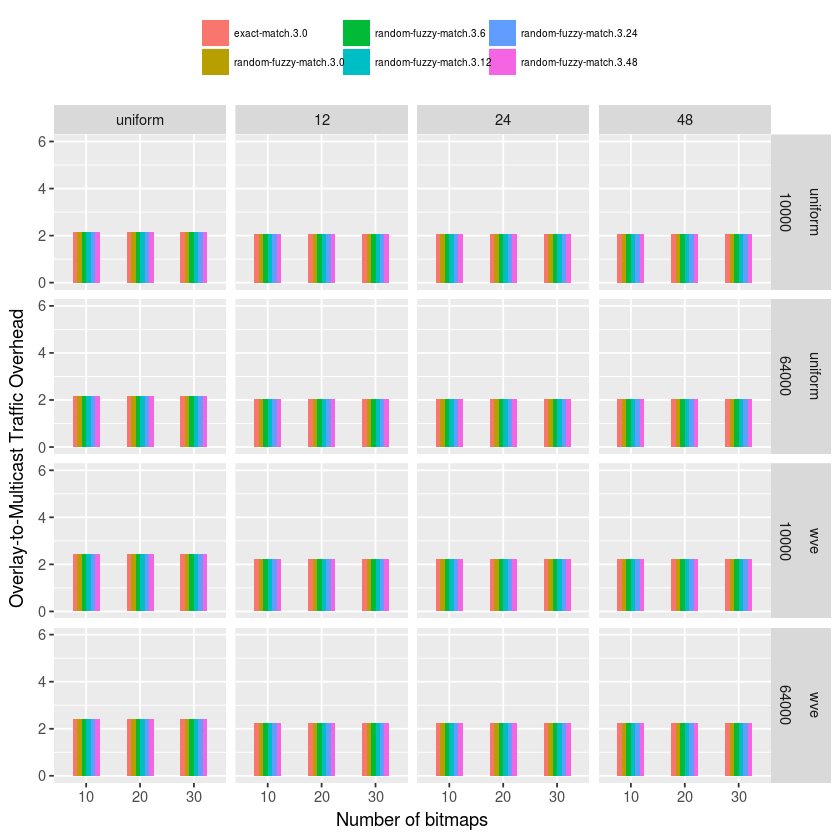

In [23]:
ggplot(trafficPerGroupPerTenant, 
       aes(y=overlayTraffic/multicastTraffic, x=factor(leafsNumBitmaps), 
           fill=interaction(leafsAlgorithm, leafsNumNodesPerBitmap, leafsRedundancyPerBitmap))) +
    stat_summary(fun.y = mean, geom = "bar", position=position_dodge(0.5), width=0.5) +
    facet_grid(groupSizeDist * leafsNumRules ~ factor(placementNumHostsPerLeaf, 
                                                      levels=c('uniform','12','24','48'))) +
    ylim(c(0, 6)) +
    xlab("Number of bitmaps") +
    ylab("Overlay-to-Multicast Traffic Overhead") +
    plotTheme
# ggsave(plt, file="leaf_spine_overlay_overhead_per_group_per_tenant.pdf", height=5, width=7)

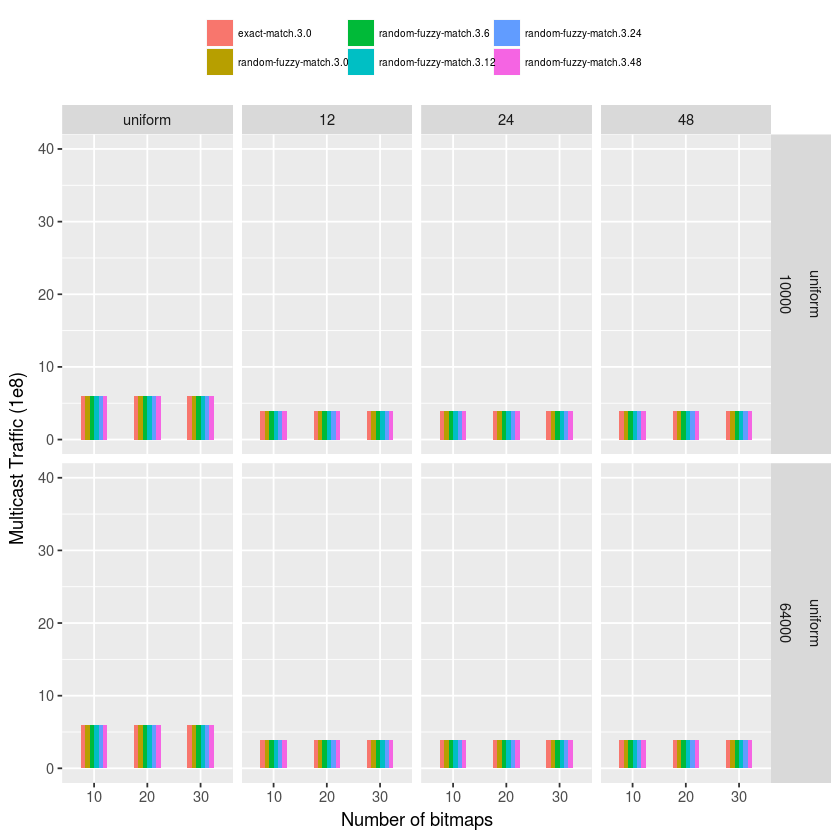

In [24]:
ggplot(trafficPerGroupPerTenant[groupSizeDist == "uniform"], 
       aes(y=multicastTraffic/1e8, x=factor(leafsNumBitmaps), 
           fill=interaction(leafsAlgorithm, leafsNumNodesPerBitmap, leafsRedundancyPerBitmap))) +
    stat_summary(fun.y = mean, geom = "bar", position=position_dodge(0.5), width=0.5) +
    facet_grid(groupSizeDist * leafsNumRules ~ factor(placementNumHostsPerLeaf, 
                                                      levels=c('uniform','12','24','48'))) +
    ylim(c(0, 40)) +
    xlab("Number of bitmaps") +
    ylab("Multicast Traffic (1e8)") +
    plotTheme

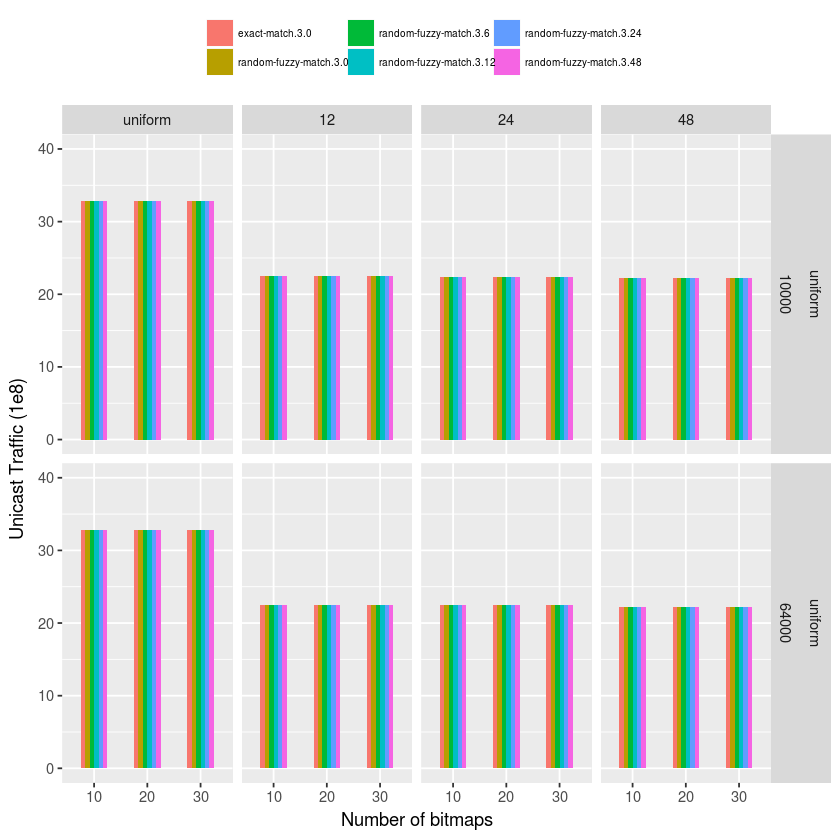

In [25]:
ggplot(trafficPerGroupPerTenant[groupSizeDist == "uniform"], 
       aes(y=unicastTraffic/1e8, x=factor(leafsNumBitmaps), 
           fill=interaction(leafsAlgorithm, leafsNumNodesPerBitmap, leafsRedundancyPerBitmap))) +
    stat_summary(fun.y = mean, geom = "bar", position=position_dodge(0.5), width=0.5) +
    facet_grid(groupSizeDist * leafsNumRules ~ factor(placementNumHostsPerLeaf, 
                                                      levels=c('uniform','12','24','48'))) +
    ylim(c(0, 40)) +
    xlab("Number of bitmaps") +
    ylab("Unicast Traffic (1e8)") +
    plotTheme

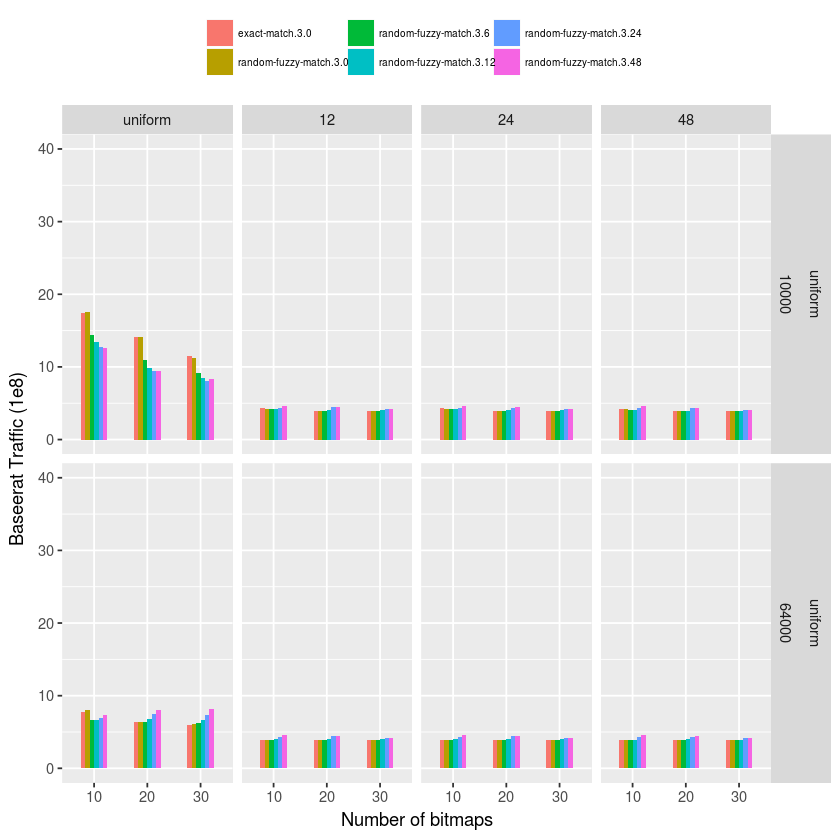

In [26]:
ggplot(trafficPerGroupPerTenant[groupSizeDist == "uniform"], 
       aes(y=baseeratTraffic/1e8, x=factor(leafsNumBitmaps), 
           fill=interaction(leafsAlgorithm, leafsNumNodesPerBitmap, leafsRedundancyPerBitmap))) +
    stat_summary(fun.y = mean, geom = "bar", position=position_dodge(0.5), width=0.5) +
    facet_grid(groupSizeDist * leafsNumRules ~ factor(placementNumHostsPerLeaf, 
                                                      levels=c('uniform','12','24','48'))) +
    ylim(c(0, 40)) +
    xlab("Number of bitmaps") +
    ylab("Baseerat Traffic (1e8)") +
    plotTheme

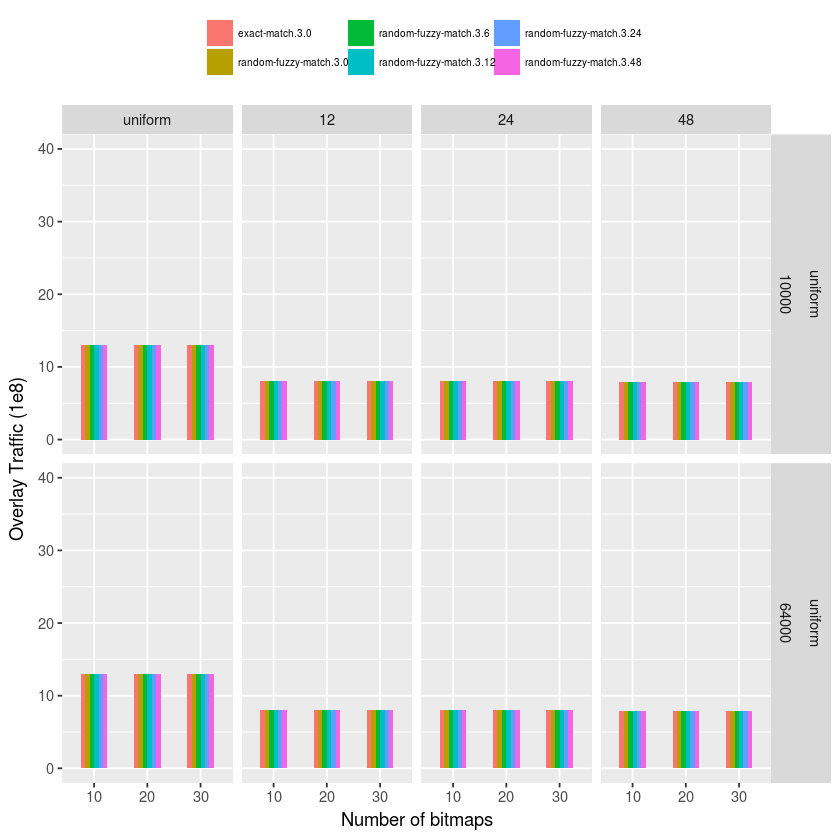

In [27]:
ggplot(trafficPerGroupPerTenant[groupSizeDist == "uniform"], 
       aes(y=overlayTraffic/1e8, x=factor(leafsNumBitmaps), 
           fill=interaction(leafsAlgorithm, leafsNumNodesPerBitmap, leafsRedundancyPerBitmap))) +
    stat_summary(fun.y = mean, geom = "bar", position=position_dodge(0.5), width=0.5) +
    facet_grid(groupSizeDist * leafsNumRules ~ factor(placementNumHostsPerLeaf, 
                                                      levels=c('uniform','12','24','48'))) +
    ylim(c(0, 40)) +
    xlab("Number of bitmaps") +
    ylab("Overlay Traffic (1e8)") +
    plotTheme